# Summarize this dataset

* The actual analytics and metrics are left up to your discretion.
* This problem is left intentionally unstructured, so just include a file or notebook that describes quantitatively what this dataset contains.

In [2]:
import pandas 

In [ ]:
data = pandas.read_csv('2015StreetTreesCensus_TREES.csv')
data = data.__next__()

In [8]:
for col in data.columns:
    print(col)

683788

# Agregation 

* Write code that will display the number of alive trees by species name (common) and by borough. 
* Include totals and percent of totals.

In [70]:
living_trees = data.loc[data['status'] == 'Alive']
totals = living_trees.groupby(['spc_latin','boroname'])['status'].count()

In [71]:
totals

spc_latin          boroname     
Acer               Bronx             995
                   Brooklyn          445
                   Manhattan          37
                   Queens           2992
                   Staten Island    2611
Acer buergerianum  Bronx               7
                   Brooklyn           12
                   Queens             68
                   Staten Island      23
Acer campestre     Bronx             798
                   Brooklyn          578
                   Manhattan          23
                   Queens            675
                   Staten Island     476
Acer ginnala       Bronx             431
                   Brooklyn          263
                   Manhattan          30
                   Queens            671
                   Staten Island     654
Acer griseum       Bronx              35
                   Brooklyn           59
                   Manhattan          15
                   Queens             73
                   State

In [72]:
totals/sum(totals)*100

spc_latin          boroname     
Acer               Bronx            0.152568
                   Brooklyn         0.068234
                   Manhattan        0.005673
                   Queens           0.458777
                   Staten Island    0.400356
Acer buergerianum  Bronx            0.001073
                   Brooklyn         0.001840
                   Queens           0.010427
                   Staten Island    0.003527
Acer campestre     Bronx            0.122361
                   Brooklyn         0.088627
                   Manhattan        0.003527
                   Queens           0.103501
                   Staten Island    0.072987
Acer ginnala       Bronx            0.066087
                   Brooklyn         0.040327
                   Manhattan        0.004600
                   Queens           0.102887
                   Staten Island    0.100281
Acer griseum       Bronx            0.005367
                   Brooklyn         0.009047
                   Man

# Tree Diameter Histogram

* Create a histogram for tree_dbh (diameter of tree).
* What is the 90% percentile diameter? 
* Create a visual depiction of this histogram.

In [85]:
import matplotlib.pyplot as plot

Text(0,0.5,'Frequency')

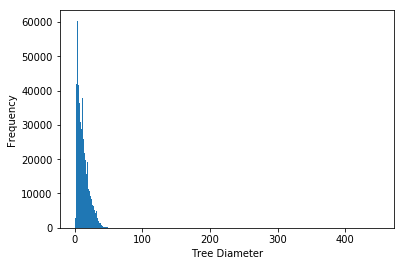

In [129]:
plot.hist(data['tree_dbh'], bins=450)
plot.xlabel('Tree Diameter')
plot.ylabel('Frequency')

In [134]:
#90th percentile diameter
diameters = data['tree_dbh']
90/100 * len(diameters) + 1 
diameters.sort_values()[615410]

12

# Nearest Neigbor 

* Write a program to determine which tree(s) have the most number of neighboring trees within a 500 foot radius? Don’t use Pandas or Spark. 
* The objective is for you to demonstrate your ability to write an efficient program. 
* Describe the algorithm of choice, including the time complexity of your solution.

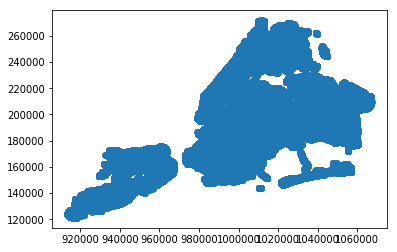

In [171]:
plot.scatter(data['x_sp'], data['y_sp'])

In [172]:
max(data['x_sp']) - min(data['x_sp'])

153898.357556

# K-D Tree

* chosen for its simplistiy and speed in partitioning the search space in log(n) time
* this algorithm buckets the points inside of a bounding box
* bilding the tree log(n)
* inserting n


In [4]:
class Node:
    def __init__(self, level=0, value=None):
        self.level = level
        self.value = value
        self.edges = (None, None)

In [21]:
class KDTree:
    def __init__(self, x, y, radius):
        self.size = 0
        self.radius = radius
        self.tree = Node()
        self.tree.value = x[len(x)//2]
        self.construct(self.tree, x, y)

    def add_node(self, level, data):
        if len(data) > 3:
            value = data[len(data)//2]
            return Node(level, value)
        else: return []

    def construct(self, node, x, y):
        if node:
            level = node.level + 1
            if level % 2:
                midpoint = len(x)//2
                left, right = x[:midpoint], x[midpoint:]
                node.edges = self.construct(self.add_node(level, left), left, y), self.construct(self.add_node(level, right), right, y)
            else:
                midpoint = len(y)//2
                down, up = y[:midpoint], y[midpoint:]
                node.edges = self.construct(self.add_node(level, down), x, down), self.construct(self.add_node(level, up), x, up)
        return node

    def bin_points(self, points):
        bins = {}
        for point in points:
            bins[str(point)] = 0
            node = self.tree
            while type(node) != type([]):
                value = point[node.level % 2]
                if value <= node.value + self.radius and value > node.value - self.radius:
                    bins[str(point)] += 1
                if value < node.value:
                    node = node.edges[0]
                else:
                    node = node.edges[1]

        return bins

In [ ]:
x = tuple(data['x_sp'])
y = tuple(data['y_sp'])
tree = KDTree(x, y, 500)
points = zip(x,y)
bins = tree.bin_points(points)
max_value = max(bins.values())  # maximum value
max_keys = [k for k, v in bins.items() if v == max_value]
print(max_keys)

# KD TEST

In [ ]:
class Node:
    def __init__(self, level=0, value=None):
        self.level = level
        self.value = value
        self.edges = (None, None)

class KDTree:
    def __init__(self, x, y, radius):
        self.size = 0
        self.radius = radius
        self.tree = Node()
        self.tree.value = x[len(x)//2]
        self.construct(self.tree, x, y)

    def add_node(self, level, data):
        if len(data) > 3:
            value = data[len(data)//2]
            return Node(level, value)
        else: return []

    def construct(self, node, x, y):
        if node:
            level = node.level + 1
            if level % 2:
                midpoint = len(x)//2
                left, right = x[:midpoint], x[midpoint:]
                node.edges = self.construct(self.add_node(level, left), left, y), self.construct(self.add_node(level, right), right, y)
            else:
                midpoint = len(y)//2
                down, up = y[:midpoint], y[midpoint:]
                node.edges = self.construct(self.add_node(level, down), x, down), self.construct(self.add_node(level, up), x, up)
        return node

    def bin_points(self, points):
        bins = {}
        for point in points:
            bins[str(point)] = 0
            node = self.tree
            while type(node) != type([]):
                value = point[node.level % 2]
                if value <= node.value + self.radius and value > node.value - self.radius:
                    bins[str(point)] += 1
                if value < node.value:
                    node = node.edges[0]
                else:
                    node = node.edges[1]

        return bins

import pandas
data = pandas.read_csv('~/Downloads/2015StreetTreesCensus_TREES.csv')
x = tuple(data['x_sp'])
y = tuple(data['y_sp'])
tree = KDTree(x, y, 500)
points = zip(x,y)
bins = tree.bin_points(points)
max_value = max(bins.values())  # maximum value
max_keys = [k for k, v in bins.items() if v == max_value]
print(max_keys)